## Observations and Insights

## Dependencies and starter code

In [51]:
# Import the relevant Modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import numpy as np
from scipy import stats

# Assign Variables to the 2 source files
study_results = "Resources\Study_results.csv"
mouse_metadata = "Resources\Mouse_metadata.csv"

# Use the 2 variables assigned above to load the 2 source files into 2 separate Data Frames
my_study_results_df = pd.read_csv(study_results)
my_mouse_metadata_df = pd.read_csv(mouse_metadata)

# Merge the data from the 2 Data Frames created above into a new single combined Data Frame 
my_merged_df = pd.merge(my_study_results_df, my_mouse_metadata_df, on="Mouse ID", how="left")

# Exports the Data Frame to an Output File 
my_merged_df.to_csv("Output/Merged_Data.csv", index=False, header=True)

# Display the first 5 rows of the new single combined Data Frame
my_merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [52]:
#====================================================================================================#
# TASK:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen
#====================================================================================================#


# Group the data by "Drug Regimen" and "Tumor Volume" and get the count of their datapoints
my_drug_regimen_count = my_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()

# Calculate the MEAN of the "Tumor Volume" for each "Drug Regimen" 
my_mean = my_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Calculate the MEDIAN of the "Tumor Volume" for each "Drug Regimen" 
my_median = my_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Calculate the VARIANCE of the "Tumor Volume" for each "Drug Regimen" 
my_variance = my_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Calculate the STANDARD DEVIATION of the "Tumor Volume" for each "Drug Regimen" 
my_standard_deviation= my_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculate the STANDARD ERROR OF THE MEAN of the "Tumor Volume" for each "Drug Regimen" 
my_standard_error_of_the_mean = my_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Create a Dictionary to be used in the Summary Statistics DataFrame
my_summary_stats_excl_DP = {"Mean Tumor Volume": my_mean, "Median Tumor Volume": my_median,"Tumor Volume Variance": my_variance,"Tumor Volume Std. Dev.": my_standard_deviation, "Tumor Volume Std. Err.": my_standard_error_of_the_mean}

# Create the Summary Statistics DataFrame from the Dictionary created in the immediate preceding step above
my_summary_stats_excl_DP_df = pd.DataFrame(my_summary_stats_excl_DP)

# Exports the Data Frame to an Output File 
my_summary_stats_excl_DP_df.to_csv("Output/Summary_Stats_data.csv", index=False, header=True)

# Display the first 5 rows of the Summary Statistics DataFrame
my_summary_stats_excl_DP_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

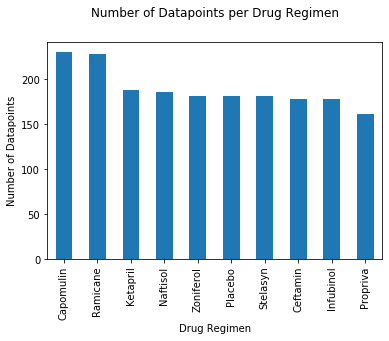

<Figure size 432x288 with 0 Axes>

In [39]:
#================================================================================================#
# TASK: Generate a bar plot showing number of data points for each treatment regimen using pandas
#================================================================================================#


# Create a Dictionary to be used in a new Summary Statistics DataFrame that also includes the count of the DataPoints
my_summary_stats_incl_DP = {"Data Points": my_drug_regimen_count, "Mean": my_mean, "Median": my_median,"Variance": my_variance,"Standard Deviation": my_standard_deviation, "SEM": my_standard_error_of_the_mean}

# Create a new Summary Statistics DataFrame from the Dictionary created in the immediate preceding step above
my_summary_stats_incl_DP_df = pd.DataFrame(my_summary_stats_incl_DP)

# Sort the Data Frame (my_summary_stats_incl_DP_df) by "Data Points" 
# This allows the Bar Chart to display the Data Points for each treatment regimen in descending order
my_summary_stats_incl_DP_df = my_summary_stats_incl_DP_df.sort_values("Data Points", ascending = False)

# Create a Data Series with the number of data points for each treatment regimen
my_datapoints_drug_regimen = my_summary_stats_incl_DP_df["Data Points"]

# Create a BAR Chart using PANDAS
my_datapoints_drug_regimen.plot(kind="bar", figsize=(6,4), color = "tab:blue", legend=False)

# Assign a title for the BAR Chart
plt.title("Number of Datapoints per Drug Regimen")

# Assign a title for the Y Axis
plt.ylabel("Number of Datapoints")

# Save the BOXPLOT Chart in the Output Folder
plt.savefig("Output/BARCHART_PANDAS.png")

# Display the BAR Chart on the Screen
plt.show()

# Ensure the BAR Chart is displayed optimally on the Screen
plt.tight_layout()



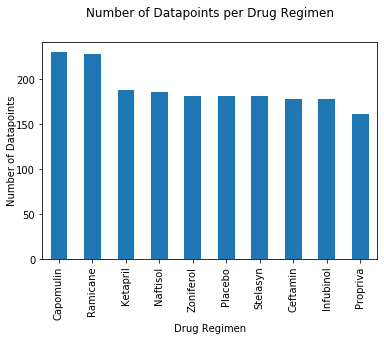

<Figure size 432x288 with 0 Axes>

In [40]:
#================================================================================================#
# TASK: Generate a bar plot showing number of data points for each treatment regimen using pyplot
#================================================================================================#


# Use the Data Series "my_datapoints_drug_regimen" to create the Values for the X Axis
x_axis = np.arange(len(my_datapoints_drug_regimen))

# Create a BAR Chart using MATPLOTLIB
plt.bar(x_axis, my_datapoints_drug_regimen, width =0.5, color="tab:blue", alpha=1, align="center")

# Assign a title for the BAR Chart
plt.title("Number of Datapoints per Drug Regimen")



## ================================================================================== ##
## Start of Formatting to make the chart look similar to the one created using PANDAS ##
## ================================================================================== ##

# Assign labels to the Values on the X Axis -- to make it look similar to the Chart created using pandas
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, my_datapoints_drug_regimen.keys())

# Set the limits of the X axis -- to make it look similar to the Chart created using pandas
plt.xlim(-0.5, len(x_axis)-0.5)

# Rotate the labels of the X axis -- to make it look similar to the Chart created using pandas
plt.xticks(rotation=90)

# Assign and format a title for the X axis -- to make it look similar to the Chart created using pandas
plt.xlabel('Drug Regimen', fontweight='regular', color = 'black', fontsize='10', horizontalalignment='center')

# Assign a title for the Y Axis
plt.ylabel("Number of Datapoints", fontweight='regular', color = 'black', fontsize='10', verticalalignment='center')

## ================================================================================ ##
## End of Formatting to make the chart look similar to the one created using PANDAS ##
## ================================================================================ ##

# Save the BOXPLOT Chart in the Output Folder
plt.savefig("Output/BARCHART_MATPLOTLIB.png")

# Show the BAR Chart on the Screen
plt.show()

# Ensure the BAR Chart is displayed optimally on the Screen
plt.tight_layout()



## Pie plots

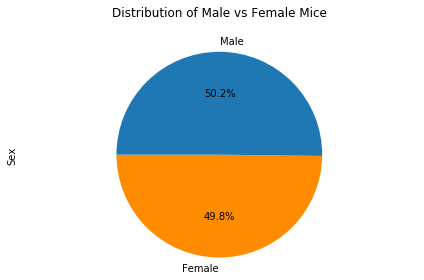

In [41]:
#============================================================================================#
# TASK: Generate a pie plot showing the distribution of female versus male mice using pandas
#============================================================================================#


# Group the data by "Sex" and "Mouse ID" and get the count of their datapoints
my_gender_count = my_merged_df.groupby("Sex")["Mouse ID"].nunique()

# Create a Dictionary to be used in the Gender Summary DataFrame
my_gender_summary = {"Data Points": my_gender_count}

# Create the Gender Summary DataFrame from the Dictionary created in the immediate preceding step above
my_gender_summary_df = pd.DataFrame(my_gender_summary)

# Create a Data Series that contains the column called Data Points
my_datapoints_gender = my_gender_summary_df["Data Points"]

# Change the name of the Data Series (my_datapoints_gender)from "Data points" to "Sex"
my_datapoints_gender.name = "Sex"

# Create a PIE Chart using PANDAS
my_datapoints_gender.plot(kind="pie",startangle=180, shadow=False, autopct="%1.1f%%", legend=False, colors = ['darkorange', 'tab:blue'])

# Assign a title for the PIE Chart
plt.title("Distribution of Male vs Female Mice")

# Increase the space ("padding") between the Plot Title and the Plot for better visual aesthetics
rcParams['axes.titlepad'] = 20 

# Ensure the PIE Chart is displayed optimally on the Screen
plt.axis('equal')
plt.tight_layout()

# Save the BOXPLOT Chart in the Output Folder
plt.savefig("Output/PIECHART_PANDAS.png")

# Display the PIE Chart on the Screen
plt.show()



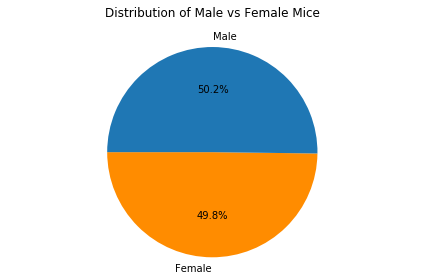

In [42]:
#============================================================================================#
# TASK: Generate a pie plot showing the distribution of female versus male mice using pyplot
#============================================================================================#


# Create a variable that contains the values to be plotted for the pie slices
values = [my_gender_count[0], my_gender_count[1]]

# Create a variable that contains the names of the pie slices
labels= my_gender_summary_df.index.values

# Declare that none of the pie slices need to be "pulled out" from the circle
explode = (0, 0)

# Declare the colors for the slices of the pie
colors = ["darkorange", "tab:blue"]

# Create a PIE Chart using MATPLOTLIB
plt.pie(values, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=False, startangle=180)

# Assign a title for the PIE Chart
plt.title("Distribution of Male vs Female Mice")

# Increase the space ("padding") between the Plot Title and the Plot for better visual aesthetics
rcParams['axes.titlepad'] = 25

# Ensure the PIE Chart is displayed optimally on the Screen
plt.axis('equal')
plt.tight_layout()

# Save the BOXPLOT Chart in the Output Folder
plt.savefig("Output/PIECHART_MATPLOTLIB.png")

# Display the PIE Chart on the Screen
plt.show()



## Quartiles, outliers and boxplots

In [43]:
#===========================================================================================================#
# TASK: Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# TASK: Calculate the IQR and quantitatively determine if there are any potential outliers. 
#===========================================================================================================#



## ========================================================================================== ##
## ALL 4 Drug Regimens Together -- THIS WAS NOT REQUIRTED FOR THE HOMEWORK                    ##
## I did this to see how the results looked when all 4 drug regimens were looked at together  ##
## ========================================================================================== ##

# Create a DataFrame that consists of all 4 promising drug Regimens -- Capomulin, Ramicane,Infubinol and Ceftamin
my_promising_regimens_df = my_merged_df.loc[ (my_merged_df["Drug Regimen"] == "Capomulin") | (my_merged_df["Drug Regimen"] == "Ramicane") | (my_merged_df["Drug Regimen"] == "Infubinol") | (my_merged_df["Drug Regimen"] == "Ceftamin") ,:]  

# Sort the DataFrame by Mouse ID and Timepoint in a Descending Order such that the final timepoint is at the top
my_promising_regimens_sorted_df = my_promising_regimens_df.sort_values(["Mouse ID", "Timepoint"],ascending=False)

# Drop all Timepoints except for the final timepoint 
my_promising_regimens_sorted_final_timepoint_df = my_promising_regimens_sorted_df.drop_duplicates(subset="Mouse ID", keep='first')

# Create a variable for the quartiles
my_quartiles = my_promising_regimens_sorted_final_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

# Create a variable for Quartile 1
my_lower_quartile = my_quartiles[0.25]

# Create a variable for Quartile 2
my_middle_quartile = my_quartiles[0.50]

# Create a variable for Quartile 3
my_upper_quartile = my_quartiles[0.75]

# Create a variable for the Inter-Quartile Range (Quartile 3 minus Quartile 1)
my_IQR = my_upper_quartile - my_lower_quartile

# Create a variable for the Lower Boundary of the Boxplot
my_lower_bound = my_lower_quartile - (1.5 * my_IQR)

# Create a variable for the Upper Boundary of the Boxplot
my_upper_bound = my_upper_quartile + (1.5 * my_IQR)

# Create a variable that identifies the outliers 
my_outliers_df = my_promising_regimens_sorted_final_timepoint_df.loc[ (my_promising_regimens_sorted_final_timepoint_df['Tumor Volume (mm3)'] > my_upper_bound) | (my_promising_regimens_sorted_final_timepoint_df['Tumor Volume (mm3)'] < my_lower_bound), :]





## ============================= ##
##           CAPOMULIN           ##
## ============================= ##

# Create a DataFrame for Capomulin
my_Capomulin_df = my_merged_df.loc[ (my_merged_df["Drug Regimen"] == "Capomulin") ,:]  

# Sort the DataFrame by Mouse ID and Timepoint in a Descending Order such that the final timepoint is at the top
my_Capomulin_sorted_df = my_Capomulin_df.sort_values(["Mouse ID", "Timepoint"],ascending=False)

# Drop all Timepoints except for the final timepoint 
my_Capomulin_sorted_final_timepoint_df = my_Capomulin_sorted_df.drop_duplicates(subset="Mouse ID", keep='first')

# Create a variable for the quartiles
my_Capomulin_quartiles = my_Capomulin_sorted_final_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

# Create a variable for Quartile 1
my_Capomulin_lower_quartile = my_Capomulin_quartiles[0.25]
my_Capomulin_lower_quartile = round(float(np.float64(my_Capomulin_lower_quartile)), 2)

# Create a variable for Quartile 2
my_Capomulin_middle_quartile = my_Capomulin_quartiles[0.50]
my_Capomulin_middle_quartile = round(float(np.float64(my_Capomulin_middle_quartile)), 2)

# Create a variable for Quartile 3
my_Capomulin_upper_quartile = my_Capomulin_quartiles[0.75]
my_Capomulin_upper_quartile = round(float(np.float64(my_Capomulin_upper_quartile)), 2)

# Create a variable for the Inter-Quartile Range (Quartile 3 minus Quartile 1)
my_Capomulin_IQR = my_Capomulin_upper_quartile - my_Capomulin_lower_quartile
my_Capomulin_IQR = round(float(np.float64(my_Capomulin_IQR)), 2)

# Create a variable for the Lower Boundary of the Boxplot
my_Capomulin_lower_bound = my_Capomulin_lower_quartile - (1.5 * my_Capomulin_IQR)
my_Capomulin_lower_bound = round(float(np.float64(my_Capomulin_lower_bound)), 2)

# Create a variable for the Upper Boundary of the Boxplot
my_Capomulin_upper_bound = my_Capomulin_upper_quartile + (1.5 * my_Capomulin_IQR)
my_Capomulin_upper_bound = round(float(np.float64(my_Capomulin_upper_bound)), 2)

# Create a variable that identifies the outliers
my_Capomulin_outliers_df = my_Capomulin_sorted_final_timepoint_df.loc[ (my_Capomulin_sorted_final_timepoint_df['Tumor Volume (mm3)'] > my_Capomulin_upper_bound) | (my_Capomulin_sorted_final_timepoint_df['Tumor Volume (mm3)'] < my_Capomulin_lower_bound), :]
my_Capomulin_outliers = my_Capomulin_outliers_df.empty
if my_Capomulin_outliers == True:
    my_Capomulin_outliers = "No Outliers"
else:
    my_Capomulin_outliers = my_Capomulin_outliers_df["Mouse ID"]



    
## ============================= ##
##           RAMICANE            ##
## ============================= ##

# Create a DataFrame for Ramicane
my_Ramicane_df = my_merged_df.loc[ (my_merged_df["Drug Regimen"] == "Ramicane") ,:]  

# Sort the DataFrame by Mouse ID and Timepoint in a Descending Order such that the final timepoint is at the top
my_Ramicane_sorted_df = my_Ramicane_df.sort_values(["Mouse ID", "Timepoint"],ascending=False)

# Drop all Timepoints except for the final timepoint 
my_Ramicane_sorted_final_timepoint_df = my_Ramicane_sorted_df.drop_duplicates(subset="Mouse ID", keep='first')

# Create a variable for the quartiles
my_Ramicane_quartiles = my_Ramicane_sorted_final_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

# Create a variable for Quartile 1
my_Ramicane_lower_quartile = my_Ramicane_quartiles[0.25]
my_Ramicane_lower_quartile = round(float(np.float64(my_Ramicane_lower_quartile)), 2)

# Create a variable for Quartile 2
my_Ramicane_middle_quartile = my_Ramicane_quartiles[0.50]
my_Ramicane_middle_quartile = round(float(np.float64(my_Ramicane_middle_quartile)), 2)

# Create a variable for Quartile 3
my_Ramicane_upper_quartile = my_Ramicane_quartiles[0.75]
my_Ramicane_upper_quartile = round(float(np.float64(my_Ramicane_upper_quartile)), 2)

# Create a variable for the Inter-Quartile Range (Quartile 3 minus Quartile 1)
my_Ramicane_IQR = my_Ramicane_upper_quartile - my_Ramicane_lower_quartile
my_Ramicane_IQR = round(float(np.float64(my_Ramicane_IQR)), 2)

# Create a variable for the Lower Boundary of the Boxplot
my_Ramicane_lower_bound = my_Ramicane_lower_quartile - (1.5 * my_Ramicane_IQR)
my_Ramicane_lower_bound = round(float(np.float64(my_Ramicane_lower_bound)), 2)

# Create a variable for the Upper Boundary of the Boxplot
my_Ramicane_upper_bound = my_Ramicane_upper_quartile + (1.5 * my_Ramicane_IQR)
my_Ramicane_upper_bound = round(float(np.float64(my_Ramicane_upper_bound)), 2)

# Create a variable that identifies the outliers
my_Ramicane_outliers_df = my_Ramicane_sorted_final_timepoint_df.loc[ (my_Ramicane_sorted_final_timepoint_df['Tumor Volume (mm3)'] > my_Ramicane_upper_bound) | (my_Ramicane_sorted_final_timepoint_df['Tumor Volume (mm3)'] < my_Ramicane_lower_bound), :]
my_Ramicane_outliers = my_Ramicane_outliers_df.empty
if my_Ramicane_outliers == True:
    my_Ramicane_outliers = "No Outliers"
else:
    my_Ramicane_outliers = my_Ramicane_outliers_df["Mouse ID"]


## ============================= ##
##           INFUBINOL           ##
## ============================= ##

# Create a DataFrame for Infubinol
my_Infubinol_df = my_merged_df.loc[ (my_merged_df["Drug Regimen"] == "Infubinol") ,:]  

# Sort the DataFrame by Mouse ID and Timepoint in a Descending Order such that the final timepoint is at the top
my_Infubinol_sorted_df = my_Infubinol_df.sort_values(["Mouse ID", "Timepoint"],ascending=False)

# Drop all Timepoints except for the final timepoint 
my_Infubinol_sorted_final_timepoint_df = my_Infubinol_sorted_df.drop_duplicates(subset="Mouse ID", keep='first')

# Create a variable for the quartiles
my_Infubinol_quartiles = my_Infubinol_sorted_final_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

# Create a variable for Quartile 1
my_Infubinol_lower_quartile = my_Infubinol_quartiles[0.25]
my_Infubinol_lower_quartile = round(float(np.float64(my_Infubinol_lower_quartile)), 2)

# Create a variable for Quartile 2
my_Infubinol_middle_quartile = my_Infubinol_quartiles[0.50]
my_Infubinol_middle_quartile = round(float(np.float64(my_Infubinol_middle_quartile)), 2)

# Create a variable for Quartile 3
my_Infubinol_upper_quartile = my_Infubinol_quartiles[0.75]
my_Infubinol_upper_quartile = round(float(np.float64(my_Infubinol_upper_quartile)), 2)

# Create a variable for the Inter-Quartile Range (Quartile 3 minus Quartile 1)
my_Infubinol_IQR = my_Infubinol_upper_quartile - my_Infubinol_lower_quartile
my_Infubinol_IQR = round(float(np.float64(my_Infubinol_IQR)), 2)

# Create a variable for the Lower Boundary of the Boxplot
my_Infubinol_lower_bound = my_Infubinol_lower_quartile - (1.5 * my_Infubinol_IQR)
my_Infubinol_lower_bound = round(float(np.float64(my_Infubinol_lower_bound)), 2)

# Create a variable for the Upper Boundary of the Boxplot
my_Infubinol_upper_bound = my_Infubinol_upper_quartile + (1.5 * my_Infubinol_IQR)
my_Infubinol_upper_bound = round(float(np.float64(my_Infubinol_upper_bound)), 2)

# Create a variable that identifies the outliers
my_Infubinol_outliers_df = my_Infubinol_sorted_final_timepoint_df.loc[ (my_Infubinol_sorted_final_timepoint_df['Tumor Volume (mm3)'] > my_Infubinol_upper_bound) | (my_Infubinol_sorted_final_timepoint_df['Tumor Volume (mm3)'] < my_Infubinol_lower_bound), :]
my_Infubinol_outliers = my_Infubinol_outliers_df.empty
if my_Infubinol_outliers == True:
    my_Infubinol_outliers = "No Outliers"
else:
    my_Infubinol_outliers = my_Infubinol_outliers_df["Mouse ID"]


## ============================= ##
##           CEFTAMIN            ##
## ============================= ##

# Create a DataFrame for Infubinol
my_Ceftamin_df = my_merged_df.loc[ (my_merged_df["Drug Regimen"] == "Ceftamin") ,:]  

# Sort the DataFrame by Mouse ID and Timepoint in a Descending Order such that the final timepoint is at the top
my_Ceftamin_sorted_df = my_Ceftamin_df.sort_values(["Mouse ID", "Timepoint"],ascending=False)

# Drop all Timepoints except for the final timepoint 
my_Ceftamin_sorted_final_timepoint_df = my_Ceftamin_sorted_df.drop_duplicates(subset="Mouse ID", keep='first')

# Create a variable for the quartiles
my_Ceftamin_quartiles = my_Ceftamin_sorted_final_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])

# Create a variable for Quartile 1
my_Ceftamin_lower_quartile = my_Ceftamin_quartiles[0.25]
my_Ceftamin_lower_quartile = round(float(np.float64(my_Ceftamin_lower_quartile)), 2)

# Create a variable for Quartile 2
my_Ceftamin_middle_quartile = my_Ceftamin_quartiles[0.50]
my_Ceftamin_middle_quartile = round(float(np.float64(my_Ceftamin_middle_quartile)), 2)

# Create a variable for Quartile 3
my_Ceftamin_upper_quartile = my_Ceftamin_quartiles[0.75]
my_Ceftamin_upper_quartile = round(float(np.float64(my_Ceftamin_upper_quartile)), 2)

# Create a variable for the Inter-Quartile Range (Quartile 3 minus Quartile 1)
my_Ceftamin_IQR = my_Ceftamin_upper_quartile - my_Ceftamin_lower_quartile
my_Ceftamin_IQR = round(float(np.float64(my_Ceftamin_IQR)), 2)

# Create a variable for the Lower Boundary of the Boxplot
my_Ceftamin_lower_bound = my_Ceftamin_lower_quartile - (1.5 * my_Ceftamin_IQR)
my_Ceftamin_lower_bound = round(float(np.float64(my_Ceftamin_lower_bound)), 2)

# Create a variable for the Upper Boundary of the Boxplot
my_Ceftamin_upper_bound = my_Ceftamin_upper_quartile + (1.5 * my_Ceftamin_IQR)
my_Ceftamin_upper_bound = round(float(np.float64(my_Ceftamin_upper_bound)), 2)

# Create a variable that identifies the outliers
my_Ceftamin_outliers_df = my_Ceftamin_sorted_final_timepoint_df.loc[ (my_Ceftamin_sorted_final_timepoint_df['Tumor Volume (mm3)'] > my_Ceftamin_upper_bound) | (my_Ceftamin_sorted_final_timepoint_df['Tumor Volume (mm3)'] < my_Ceftamin_lower_bound), :]
my_Ceftamin_outliers = my_Ceftamin_outliers_df.empty
if my_Ceftamin_outliers == True:
    my_Ceftamin_outliers = "No Outliers"
else:
    my_Ceftamin_outliers = my_Ceftamin_outliers_df["Mouse ID"]
    
    

print("====================================")
print("CAPOMULIN")
print("====================================")
print("DataPoints: " + str(len(my_Capomulin_sorted_final_timepoint_df)))
print("Quartile 1: " + str(my_Capomulin_lower_quartile))
print("Quartile 2: " + str(my_Capomulin_middle_quartile))
print("Quartile 3: " + str(my_Capomulin_upper_quartile))
print("IQR: " + str(my_Capomulin_IQR))
print("Lower Bound: " + str(my_Capomulin_lower_bound))
print("Upper Bound: " + str(my_Capomulin_upper_bound))
print("Outliers: " + str(my_Capomulin_outliers))
print("====================================")
print()
print()
print("====================================")
print("RAMICANE")
print("====================================")
print("DataPoints: " + str(len(my_Ramicane_sorted_final_timepoint_df)))
print("Quartile 1: " + str(my_Ramicane_lower_quartile))
print("Quartile 2: " + str(my_Ramicane_middle_quartile))
print("Quartile 3: " + str(my_Ramicane_upper_quartile))
print("IQR: " + str(my_Ramicane_IQR))
print("Lower Bound: " + str(my_Ramicane_lower_bound))
print("Upper Bound: " + str(my_Ramicane_upper_bound))
print("Outliers: " + str(my_Ramicane_outliers))
print("====================================")
print()
print()
print("====================================")
print("INFUBINOL")
print("====================================")
print("DataPoints: " + str(len(my_Infubinol_sorted_final_timepoint_df)))
print("Quartile 1: " + str(my_Infubinol_lower_quartile))
print("Quartile 2: " + str(my_Infubinol_middle_quartile))
print("Quartile 3: " + str(my_Infubinol_upper_quartile))
print("IQR: " + str(my_Infubinol_IQR))
print("Lower Bound: " + str(my_Infubinol_lower_bound))
print("Upper Bound: " + str(my_Infubinol_upper_bound))
print("Outliers: " + str(my_Infubinol_outliers))
print("====================================")
print()
print()
print("====================================")
print("CEFTAMIN")
print("====================================")
print("DataPoints: " + str(len(my_Ceftamin_sorted_final_timepoint_df)))
print("Quartile 1: " + str(my_Ceftamin_lower_quartile))
print("Quartile 2: " + str(my_Ceftamin_middle_quartile))
print("Quartile 3: " + str(my_Ceftamin_upper_quartile))
print("IQR: " + str(my_Ceftamin_IQR))
print("Lower Bound: " + str(my_Ceftamin_lower_bound))
print("Upper Bound: " + str(my_Ceftamin_upper_bound))
print("Outliers: " + str(my_Ceftamin_outliers))
print("====================================")



CAPOMULIN
DataPoints: 25
Quartile 1: 32.38
Quartile 2: 38.13
Quartile 3: 40.16
IQR: 7.78
Lower Bound: 20.71
Upper Bound: 51.83
Outliers: No Outliers


RAMICANE
DataPoints: 25
Quartile 1: 31.56
Quartile 2: 36.56
Quartile 3: 40.66
IQR: 9.1
Lower Bound: 17.91
Upper Bound: 54.31
Outliers: No Outliers


INFUBINOL
DataPoints: 25
Quartile 1: 54.05
Quartile 2: 60.17
Quartile 3: 65.53
IQR: 11.48
Lower Bound: 36.83
Upper Bound: 82.75
Outliers: 420    c326
Name: Mouse ID, dtype: object


CEFTAMIN
DataPoints: 25
Quartile 1: 48.72
Quartile 2: 59.85
Quartile 3: 64.3
IQR: 15.58
Lower Bound: 25.35
Upper Bound: 87.67
Outliers: No Outliers


<Figure size 432x288 with 0 Axes>

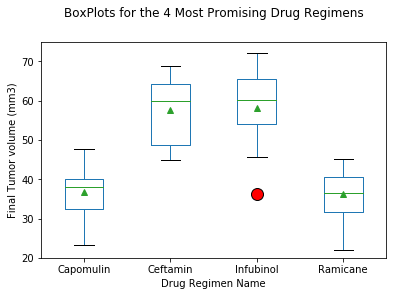

In [44]:
#====================================================================================================#
# TASK: Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#====================================================================================================#


# Create a Dataframe for Capomulin
my_Capomulin_sorted_final_timepoint_BP_df = my_Capomulin_sorted_final_timepoint_df[["Tumor Volume (mm3)","Drug Regimen"]]

# Create a Dataframe for Ramicane
my_Ramicane_sorted_final_timepoint_BP_df = my_Ramicane_sorted_final_timepoint_df[["Tumor Volume (mm3)","Drug Regimen"]]

# Create a Dataframe for Infubinol
my_Infubinol_sorted_final_timepoint_BP_df = my_Infubinol_sorted_final_timepoint_df[["Tumor Volume (mm3)","Drug Regimen"]]

# Create a Dataframe for Ceftamin
my_Ceftamin_sorted_final_timepoint_BP_df = my_Ceftamin_sorted_final_timepoint_df[["Tumor Volume (mm3)","Drug Regimen"]]

# Create a Coimbined Dataframe
my_COMBINED_df = pd.concat([my_Capomulin_sorted_final_timepoint_BP_df, my_Ramicane_sorted_final_timepoint_BP_df, my_Infubinol_sorted_final_timepoint_BP_df, my_Ceftamin_sorted_final_timepoint_BP_df])

# Specify the box parameters
boxprops = dict(linestyle='-', linewidth=1, color='black')

# Specify the median parameters
medianprops = dict(linestyle='-', linewidth=1, color='firebrick')

# Specify the outlier parameters
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')

# Create a Box Plot for the 4 Most Promising Drug Regimens
plt.figure()
ax = my_COMBINED_df.boxplot(column=["Tumor Volume (mm3)"],by="Drug Regimen", showmeans=True, boxprops=boxprops,medianprops=medianprops,flierprops=flierprops)
  
# Create a title for the Box Plot    
plt.title("BoxPlots for the 4 Most Promising Drug Regimens")
plt.suptitle("")

# Set the Y Axis limits
plt.ylim(20, 75)

# Set the X Axis Label
ax.set_xlabel("Drug Regimen Name")

# Set the Y Axis Label
ax.set_ylabel("Final Tumor volume (mm3)")

# Set the Grid Parameter to not show a grid
ax.grid(False)

# Save the BOXPLOT Chart in the Output Folder
plt.savefig("Output/BOXPLOT.png")

# Display the BOXPLOT Chart on the Screen
plt.show()






## Line and scatter plots

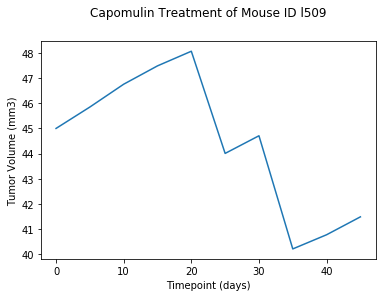

In [45]:
#===========================================================================================#
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#===========================================================================================#


# Create a Data Frame with data for just Mouse ID l509 treated by Capomulin
my_Capomulin_Individual_Mouse_df = my_Capomulin_df.loc[ (my_Capomulin_df["Mouse ID"] == "l509") ,:]  

# Create a variable for the X Axis
x_axis = my_Capomulin_Individual_Mouse_df["Timepoint"]

# Create a variable for the Y Axis
y_axis = my_Capomulin_Individual_Mouse_df["Tumor Volume (mm3)"]

# Create a Line Chart
plt.plot(x_axis, y_axis)

# Assign a Title to the Line Chart
plt.title("Capomulin Treatment of Mouse ID l509")

# Set the X Axis Label 
plt.xlabel("Timepoint (days)")

# Set the Y Axis Label
plt.ylabel("Tumor Volume (mm3)")

# Increase the space ("padding") between the Plot Title and the Plot for better visual aesthetics
rcParams['axes.titlepad'] = 20

# Save the LINECHART in the Output Folder
plt.savefig("Output/LINECHART.png")

# Display the LINE Chart on the Screen
plt.show()



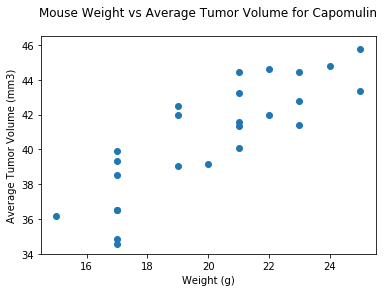

In [46]:
#===============================================================================================#
# TASK: Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#===============================================================================================#


# Create a variable x that contains the Mouse Weight
x_values = my_Capomulin_df.groupby(my_Capomulin_df["Mouse ID"])["Weight (g)"].mean()

# Create a variable y that contains the Average Tumor Volume
y_values = my_Capomulin_df.groupby(my_Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create a scatter plot that plots the Mouse Weight and Average Tumor Volume  
plt.scatter(x_values, y_values)

# Set the limits of the Y Axis
plt.ylim(34, 46.5)

# Set the X Axis Label
plt.xlabel("Weight (g)")

# Set the Y Axis Label
plt.ylabel("Average Tumor Volume (mm3)")

# Assign a Title to the Scatter Plot
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_CAPOMULIN.png")

# Display the Scatter plot 
plt.show()




The correlation (R) between mouse weight and the average tumor volume is 0.84
The coefficient of determination (R Squared) is 0.71
The Regression Line equation is:  Average Mouse Tumor Volume (mm3) = 0.95 times Mouse Weight (g) + 21.55


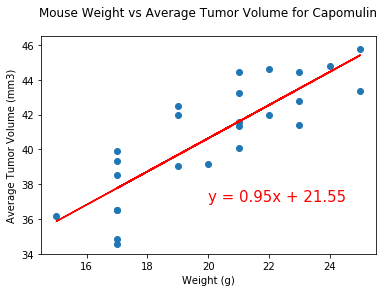

In [47]:
#===================================================================================================================#
# TASK: Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
#===================================================================================================================#


# Create a variable x that contains the Mouse Weight
x_values = my_Capomulin_df.groupby(my_Capomulin_df["Mouse ID"])["Weight (g)"].mean()

# Create a variable y that contains the Average Tumor Volume
y_values = my_Capomulin_df.groupby(my_Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Create equation of line to calculate predicted Tumor Volume
regress_values = slope * x_values + intercept

# Create a variable that contains the Regression Line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot that plots the Mouse Weight and Average Tumor Volume  
plt.scatter(x_values, y_values)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values,regress_values,"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Set the limits of the Y Axis
plt.ylim(34, 46.5)

# Set the X Axis Label
plt.xlabel("Weight (g)")

# Set the Y Axis Label
plt.ylabel("Average Tumor Volume (mm3)")

# Assign a Title to the Scatter Plot
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")

# Calculate the Correlation Coefficient
my_correlation = stats.pearsonr(x_values,y_values)

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print(f"The correlation (R) between mouse weight and the average tumor volume is {round(my_correlation[0],2)}")
print(f"The coefficient of determination (R Squared) is {round((my_correlation[0] * my_correlation[0]),2)}")
print( "The Regression Line equation is:  Average Mouse Tumor Volume (mm3) = " + str(round(slope,2)) + " times Mouse Weight (g) + " + str(round(intercept,2)) ) 

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_WITH_REGRESSION_CAPOMULIN.png")

# Display the Scatter plot with the Regression line Equation
plt.show()



The correlation (R) between mouse weight and the average tumor volume is 0.81
The coefficient of determination (R Squared) is 0.65
The Regression Line equation is:  Average Mouse Tumor Volume (mm3) = 0.77 times Mouse Weight (g) + 25.16


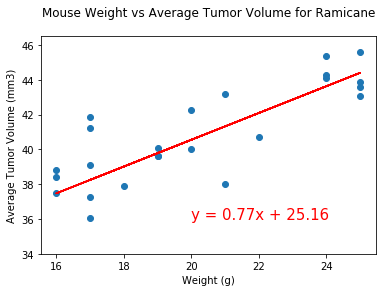

In [48]:
#===================================================================================================================#
# NOTE: THIS WAS NOT PART OF THE HOMEWORK - - I DID IT JUST TO SEE HOW THE REGRESSION EQUATRION LOOKED FOR RAMICANE
# TASK: Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Ramicane regimen
#===================================================================================================================#


# Create a variable x that contains the Mouse Weight
x_values_2 = my_Ramicane_df.groupby(my_Ramicane_df["Mouse ID"])["Weight (g)"].mean()

# Create a variable y that contains the Average Tumor Volume
y_values_2 = my_Ramicane_df.groupby(my_Ramicane_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression 
(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = stats.linregress(x_values_2, y_values_2)

# Create equation of line to calculate predicted Tumor Volume
regress_values_2 = slope_2 * x_values_2 + intercept_2

# Create a variable that contains the Regression Line Equation
line_eq_2 = "y = " + str(round(slope_2,2)) + "x + " + str(round(intercept_2,2))

# Create a scatter plot that plots the Mouse Weight and Average Tumor Volume  
plt.scatter(x_values_2, y_values_2)

# Plot the Regression Line on the Scatter Plot 
plt.plot(x_values_2,regress_values_2,"-", color="red")

# Plot the Equatrion of the Regression Line on the Scatter Plot
plt.annotate(line_eq_2,(20,36),fontsize=15,color="red")

# Set the limits of the Y Axis
plt.ylim(34, 46.5)

# Set the X Axis Label
plt.xlabel("Weight (g)")

# Set the Y Axis Label
plt.ylabel("Average Tumor Volume (mm3)")

# Assign a Title to the Scatter Plot
plt.title("Mouse Weight vs Average Tumor Volume for Ramicane")

# Calculate the Correlation Coefficient
my_correlation_2 = stats.pearsonr(x_values_2,y_values_2)

# Print the correlation coefficient (R), the coefficient of determination (R Squared) and the equation of the Regression Line
print(f"The correlation (R) between mouse weight and the average tumor volume is {round(my_correlation_2[0],2)}")
print(f"The coefficient of determination (R Squared) is {round((my_correlation_2[0] * my_correlation_2[0]),2)}")
print( "The Regression Line equation is:  Average Mouse Tumor Volume (mm3) = " + str(round(slope_2,2)) + " times Mouse Weight (g) + " + str(round(intercept_2,2)) ) 

# Save the SCATTERPLOT Chart in the Output Folder
plt.savefig("Output/SCATTERPLOT_WITH_REGRESSION_RAMICANE.png")

# Display the Scatter plot with the Regression line Equation
plt.show()

